## Inverse Kinematics for a Rotary Stewart Platform

This page will show you how, given the (diagonal) inertia tensor and mass for your loaded motion platform, the accelerations and rotations you requested for your platform to undergo, and the directions of the connecting rods between the platform and the motor (solved in another notebook), you can obtain the forces in each connecting rod, and eventually the torques needed in each of the 6 motors. This is imperative when designing your platform so that you choose motors that can perform appropriately.

### Newton's Laws

We will be using Newton's 2nd law to solve the inverse kinematics problem. There are 6 connecting rods attached to the motion base. 

$$ \sum{\vec{F_i}} = m\vec{a}$$

This vector equation can be broken down into three components.

$$\sum{F_i \hat{e}_i \cdot \hat{\imath}} = m\ddot{x}$$

$$ \sum{F_i \hat{e}_i \cdot \hat{\jmath}} = m\ddot{y}$$

$$ \sum{F_i \hat{e}_i \cdot \hat{k}} = m\ddot{z}$$

We can also write an equation for the moment balance on the platform, taken about the center of mass of the platform. We will denote by $\vec{r}_{i/g}$ the vector connecting the platform's center of mass to each force application point. We can then write the 6 moments caused by each of the 6 connecting rod forces (connecting rods are two-force members) as:

$$\sum \vec{r}_{i/g} \times  \left( F_i \hat{e}_i \right) = {J}\vec{\ddot{\theta}}  $$

This equation, too, can be broken up into components by $x,y,z$ directions, assuming that we are taking moments about principle axes $x,y,z$ (off-diagonal terms in the inertia tensor are 0).

$$ \sum \vec{r}_{i/g} \times  \left( F_i \hat{e}_i \right)\cdot \hat{\imath} = {J_{xx}}\ddot{\theta}_x  $$

$$ \sum \vec{r}_{i/g} \times  \left( F_i \hat{e}_i \right)\cdot \hat{\jmath} = {J_{yy}}\ddot{\theta}_y  $$

$$ \sum \vec{r}_{i/g} \times  \left( F_i \hat{e}_i \right)\cdot \hat{k} = {J_{zz}}\ddot{\theta}_z  $$

Because we have 6 equations (3 for force balance, 3 for moment balance), and we have six unknowns (the connecting rod force magnitudes $F_i$), we can reform the problem as a matrix equation.

$$ \begin{bmatrix}  
\hat{e}_1 \cdot \hat{\imath} & \hat{e}_2 \cdot \hat{\imath}  & \hat{e}_3 \cdot \hat{\imath} & \hat{e}_4 \cdot \hat{\imath} & \hat{e}_5 \cdot \hat{\imath} & \hat{e}_6 \cdot \hat{\imath} \\
\hat{e}_1 \cdot \hat{\jmath} & \hat{e}_2 \cdot \hat{\jmath}  & \hat{e}_3 \cdot \hat{\jmath} & \hat{e}_4 \cdot \hat{\jmath} & \hat{e}_5 \cdot \hat{\jmath} & \hat{e}_6 \cdot \hat{\jmath} \\
\hat{e}_1 \cdot \hat{k} & \hat{e}_2 \cdot \hat{k}  & \hat{e}_3 \cdot \hat{k} & \hat{e}_4 \cdot \hat{k} & \hat{e}_5 \cdot \hat{k} & \hat{e}_6 \cdot \hat{k} \\
\left( \vec{r}_{1/g} \times  \hat{e}_1\right) \cdot \hat{\imath}  & \left( \vec{r}_{2/g} \times  \hat{e}_2 \right)\cdot \hat{\imath}  & \left( \vec{r}_{3/g} \times  \hat{e}_3 \right)\cdot \hat{\imath}  & \left( \vec{r}_{4/g} \times  \hat{e}_4\right) \cdot \hat{\imath}  & \left( \vec{r}_{5/g} \times  \hat{e}_5\right) \cdot \hat{\imath}  & \left( \vec{r}_{6/g} \times  \hat{e}_6\right) \cdot \hat{\imath}  \\
\left( \vec{r}_{1/g} \times  \hat{e}_1 \right)\cdot \hat{\jmath}  & \left(\vec{r}_{2/g} \times  \hat{e}_2 \right)\cdot \hat{\jmath}  & \left( \vec{r}_{3/g} \times  \hat{e}_3\right) \cdot \hat{\jmath}  & \left( \vec{r}_{4/g} \times  \hat{e}_4  \right)\cdot \hat{\jmath} & \left( \vec{r}_{5/g} \times  \hat{e}_5\right) \cdot \hat{\jmath}  & \left( \vec{r}_{6/g} \times  \hat{e}_6 \right)\cdot \hat{\jmath}  \\
\left( \vec{r}_{1/g} \times \hat{e}_1\right) \cdot \hat{k}  & \left( \vec{r}_{2/g} \times  \hat{e}_2\right) \cdot \hat{k}  & \left( \vec{r}_{3/g} \times  \hat{e}_3\right) \cdot \hat{k}  & \left( \vec{r}_{4/g} \times  \hat{e}_4 \cdot \right)\hat{k}  & \left( \vec{r}_{5/g} \times  \hat{e}_5 \right)\cdot \hat{k}  & \left( \vec{r}_{6/g} \times  \hat{e}_6\right) \cdot \hat{k}  \\
\end{bmatrix} \begin{bmatrix}F_1 \\ F_2 \\ F_3 \\ F_4 \\ F_5 \\ F_6 \end{bmatrix} = \begin{bmatrix} m\ddot{x} \\ m\ddot{y} \\ m\ddot{z}+mg \\ J_{xx}\ddot{\theta}_x \\ J_{yy}\ddot{\theta}_y \\ J_{zz}\ddot{\theta}_z \end{bmatrix}$$

This equation is in the classic $Ax=b$ form, and can be solved using linear algebra. If the matrix $A$ is not invertible (if the determinant is zero), it indicates that the forces and moments we require for the motion base cannot be reacted by the connecting rods. This, if encountered, would indicate a design issue.

Once we have the magnitudes of the connecting rod forces, we can find the torque required for the motor. We know that the moment about $O$ due to the con-rod force will be:

$$\vec{M}_i = \vec{r}_{Q/O,i} \times -\vec{F}_i$$

But this gives us a total moment in the global $XYZ$ coordinate system. To get the moment that the motor will have to react, we need to find the component of this moment that is in the same direction as the motor's axis of rotation. Simply put, we can do this using a dot product if we have a unit vector describing the motor's axis (which we do). We will call this unit vector $\hat{e}_{m,i}$ and we then get the required motor torque to be:

$$M_i = \left(\vec{r}_{Q/O,i} \times -\vec{F}_i\right)\cdot \hat{e}_{m,i}$$

the motor's unit vector is easily obtained by considering its yaw angle with respect to the global $XYZ$ coordinate system as:

$$\hat{e}_{m,i} = \left[ \cos \psi_{m,i},\sin \psi_{m,i},0\right]^T$$

Once this dot product is computed, we can produce motor performance curves by plotting  $\left|M_i\right|$ vs. $\frac{d\theta_{m,i}}{dt}$ and picking a motor whose torque-omega curve encompasses our required performance curve with some factor of safety.

## Putting this into practice

In order to show this procedure in action, we will have to simulate the entire pipeline of the motion base's operation from vehicle inputs all the way to the torques on each motor. This requires a few steps.

1. Take steering and other vehicle inputs we are likely to see and generate vehicle state trajectories. Alternatively, load vehicle states from data acquired on a real vehicle.
2. Take these vehicle states, scale them, and apply low and high pass filters to each channel to generate platform trajectories.
3. Compute the necessary derivatives of the platform trajectories to feed into the inverse kinetic model
4. perform the kinetic analysis

## Vehicle States

To generate vehicle states, we will use a model I built in Python that assumes a planar vehicle (no roll/pitch) with a constant-horsepower engine and a nonlinear, physics-based tire model. We'll use most of the default parameters, and the "autopilot" feature which allows us to define a road geometry and speed limit profile, and let the vehicle drive itself as it tries to stay on the road. We'll simulate a vehicle accelerating to $20 \frac{m}{s}$ and then performing a 4 meter lane change over the course of 3 seconds. This is fairly moderate driving for the most part.

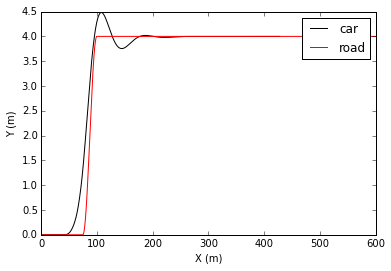

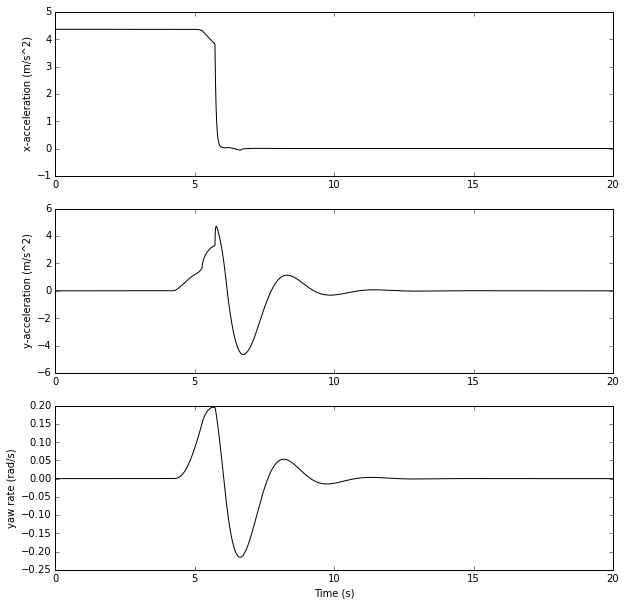

In [1]:
%matplotlib inline
from motionbase import MotionBase #this is the motion base "class" which holds the base's relevant variables and utility functions
from matplotlib.pyplot import *
from numpy import *
from DugoffBicycleModel import DugoffBicycleModel

#initialize a car using the Dugoff Bicycle Model class which is in this directory.
car = DugoffBicycleModel(autopilot_gain=.005,dT=0.01)
#initialize the lateral position of the car.
car.x[0] = 0.5
#how long will we simulate the car for?
simtime = 20

#now we will build a road upon which the car should drive. We will define a road by an X, a Y, an S, and a speed profile.
granularity = .25 #meter. How much distance in between road points.
roadlength = 600
#global XY position of the road
roadx = arange(0,roadlength,granularity)
roady = zeros(len(roadx))
#now a speed profile. Make it constant for now.
speedlimit =25 #m/s
roadspeed = speedlimit*ones(len(roadx))
#now put in a lane change halfway down the road that will last 2 sec
lanewidth = 4 #meters
LC_time = 1 #seconds
LC_x = arange(0,speedlimit*LC_time,granularity) #this is how long in the x-direction the lane change should take
LC_y = lanewidth/2*(1-cos(LC_x*(pi/(speedlimit*LC_time))))
roady[roadlength/2:roadlength/2+len(LC_x)] = LC_y
roady[roadlength/2+len(LC_x):]=lanewidth

#now let's simulate the car driving on said road with the simple steering autopilot
t = arange(0,simtime,car.dT)
#we will use the "farthest ahead" point that the car can "see" to drive the simple autopilot.
xvec = car.x
xdotvec = array([0,0,0,0,0,0])#initialize state derivatives.
tpreview = 3.0 #seconds
Nsteps = 1 #prediction horizon 
preview_time = tpreview*Nsteps #seconds
#initialize that we are stomping on the gas full force.
brake,gas,steer = 0,1,0
#initialize a vector to store autopilot steer angles
steervec = zeros(len(t))

for ind in range(1,len(t)):
    #print ind
    #first look up the y of the road
    if car.x[3]==0:
        #if car is not moving, pretend that it is so that preview vector doesn't go crazy.
        preview_dist_vector = arange(0,(Nsteps)*preview_time)*0.1
    else:
        preview_dist_vector = arange(0,(Nsteps)*preview_time)*car.x[3]

    #now figure out what the previewed vector of road y-positions is. Use interpolation for this.
    roadvec = interp(car.x[2]+preview_dist_vector,roadx,roady,left=0,right=0)
    speedvec = interp(car.x[2]+preview_dist_vector,roadx,roadspeed,left=0,right=0)
    if len(roadvec)<Nsteps:
        roadvec = roady[-1]*ones(len(preview_dist_vector))
        speedvec = speedlimit*ones(len(preview_dist_vector))
    #print len(preview_dist_vector)

    #update car. use a simple lookahead "lever arm" to pass as a path error.
    x,xdot = car.euler_update(steer=0,gas=0,brake=0,cruise='on',autopilot='on',setspeed=speedvec[-1],patherror=(roadvec[-1]-(car.x[0]+preview_dist_vector[-1]*sin(car.x[4]))))
    xvec = vstack((xvec,x))#update the stored states
    xdotvec = vstack((xdotvec,xdot))#update the stored state derivatives.

#The x-accel is the 4th row in the state derivative vector.
a_x = xdotvec[:,3]
#the lateral accel is Vdot+U*r
a_y = xdotvec[:,1]+xvec[:,3]*xvec[:,5]
#because the car model is planar, we can't get much info about any of the other states except yaw rate
yawrate = xvec[:,5]

#plot the path of the car
figure()
plot(xvec[:,2],xvec[:,0],'k',roadx,roady,'r')
xlabel('X (m)')
ylabel('Y (m)')
legend(['car','road'])

#plot the states we've stored for our motion base simulation
figure(figsize=(10,10))
subplot(3,1,1)
plot(t,a_x,'k')
ylabel('x-acceleration (m/s^2)')
subplot(3,1,2)
plot(t,a_y,'k')
ylabel('y-acceleration (m/s^2)')
subplot(3,1,3)
plot(t,yawrate,'k')
xlabel('Time (s)')
ylabel('yaw rate (rad/s)')


As you can see, we were able to generate accelerations and a yaw rate for the simulated vehicle under a standard maneuver set. This will allow us to feed into the low and high pass filters for the motion platform, generate a vector of poses, and complete our kinetic analysis.

## Creating The High and Low Pass Filter Pairs

As we've discussed before, we simulate $x$ and $y$ accelerations using a high pass filter on actual x-movement, and a low pass filter on motion base tilt. This allows us to take advantage of gravity to help a driver feel these accelerations in steady state. We use high pass filters to cue all angular rates. This general setup is shown in the figure below

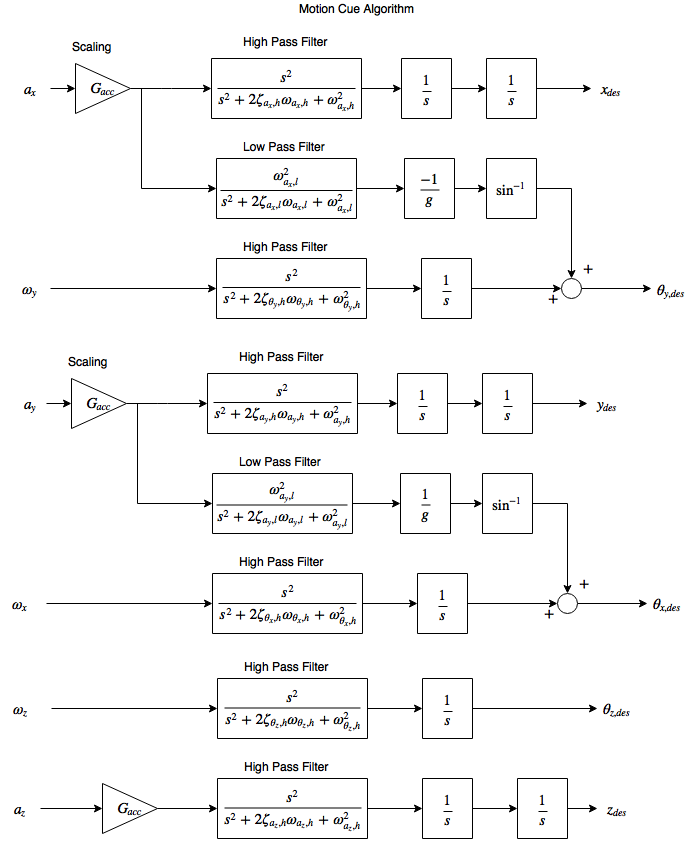

In [2]:
from IPython.display import Image
Image(filename='lowpass_highpass-2.png') 

These filters are represented in continuous time. Unfortunately, we won't be using continuous time on the final motion base, so we will want to convert all of these to discrete time transfer functions, and eventually to difference equations so that the desired platform pose can be computed at each discrete time step we would like to simulate. To facilitate this, recall that the discrete transfer function can be calculated using the Z-transform as:

$$ G(z) = \left(1-z^{-1} \right) \mathcal{Z} \left\{ \frac{G(s)}{s} \right\} $$

This could get fairly involved in the final version of the motion cue code, so we will leave the filters in continuous time for now. Let's take our modeled vehicle state vector and pass the relevant states through the motion cue algorithm so that we can continue with the analysis.

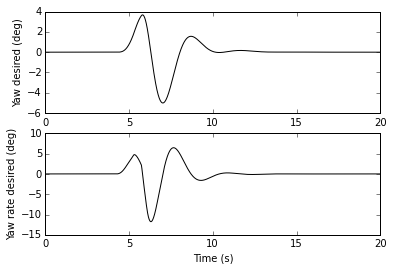

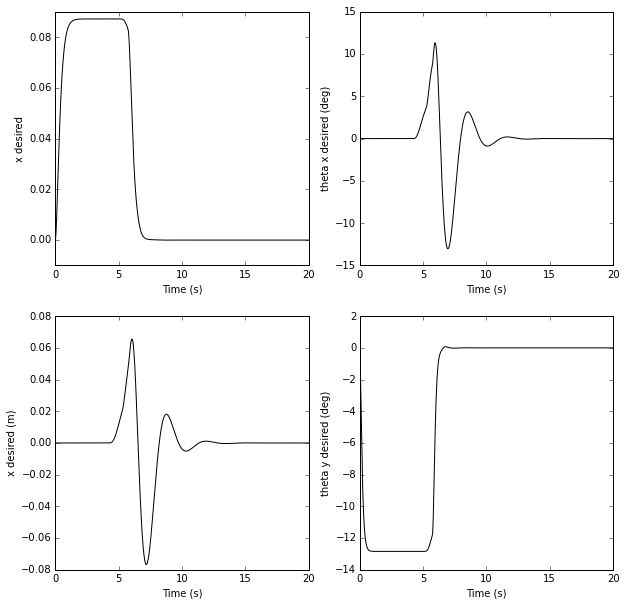

In [3]:
#import the functions we might need from Scipy to facilitate the simulation
from scipy.signal import lti,lsim
from numpy import *

g = 9.81#m/s/s
Ga = 0.5 #we will simulate half of the true acceleration of the vehicle

#construct the high and low pass pairs for the x and y acceleration
whp_a = 5 #high pass frequency on x and y acceleration
zetahp_a = 1 #high pass damping ratio on x and y acceleration
wlp_a = 10 #low pass frequency on x and y acceleration for tilt values
zetalp_a = 1 #low pass frequency on x and y acceleration for tilt values

#there are no omega_x and omega_y values with the bicycle model so we will not construct those filters.
#we will construct a high pass filter for yaw rate
whp_yaw = 1
zetahp_yaw = 1

#create transfer function for HP filt using lti function lti(num,den)
HP_a = lti(array([1,0,0]),array([1,2*zetahp_a*whp_a,whp_a**2]))
#same for low pass acceleration filter
LP_a = lti([wlp_a**2],[1,2*zetalp_a*wlp_a,wlp_a**2])
#same for high pass yaw rate filter
HP_yaw= lti(array([1,0,0]),array([1,2*zetahp_yaw*whp_yaw,whp_yaw**2]))

#grab integrator and double integrator
integ = lti(array([1]),array([1,0]))
double_integ = lti(array([1]),array([1,0,0]))

#now we will feed ax into the high-pass filter and double integrate to get our x desired.
lowpass_ax = lti.output(LP_a,a_x*Ga,t,0)
lowpass_ay = lti.output(LP_a,a_y*Ga,t,0)

theta_y = arcsin(-lowpass_ax[1]/g)
theta_x = arcsin(lowpass_ay[1]/g)
#highpass and double integrate for x desired
highpass_ax = lti.output(HP_a,a_x*Ga,t,0)
highpass_ay = lti.output(HP_a,a_y*Ga,t,0)
x_desired = lti.output(double_integ,highpass_ax[1],t,0)
y_desired = lti.output(double_integ,highpass_ay[1],t,0)

yaw_highpass = lti.output(HP_yaw,yawrate,t,0)
yaw_desired = lti.output(integ,yaw_highpass[1],t,0)

figure()
subplot(2,1,1)
plot(t,yaw_desired[1]*180/pi,'k')
xlabel('Time (s)')
ylabel('Yaw desired (deg)')
subplot(2,1,2)
plot(t,yaw_highpass[1]*180/pi,'k')
xlabel('Time (s)')
ylabel('Yaw rate desired (deg)')

figure(figsize = (10,10))
subplot(2,2,1)
plot(t,x_desired[1],'k')
xlabel('Time (s)')
ylabel('x desired')
subplot(2,2,2)
plot(t,theta_x*180/pi,'k')
xlabel('Time (s)')
ylabel('theta x desired (deg)')
subplot(2,2,3)
plot(t,y_desired[1],'k')
xlabel('Time (s)')
ylabel('x desired (m)')
subplot(2,2,4)
plot(t,theta_y*180/pi,'k')
xlabel('Time (s)')
ylabel('theta y desired (deg)')



Now, we have trajectories for the platform in $x$,$y$,$\theta_x$,$\theta_y$,$\theta_z$. We know that with the planar vehicle trajectory, we don't have any excitation in the $z$-direction. We will now take all 6 of the known trajectories, and assemble the 6x6 matrix to get a vector of con-rod force magnitudes.

initializing base...
done
(2000,) (2000,) (2000,) (2000,) (2000,) (2000,)


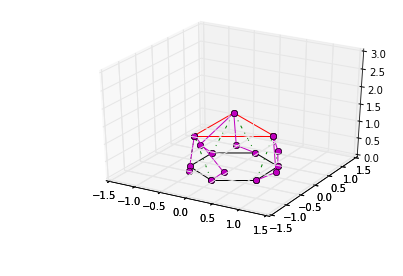

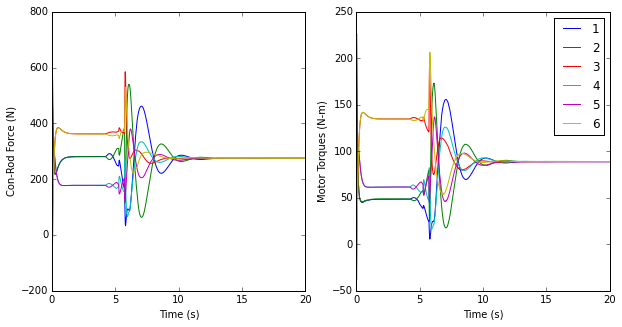

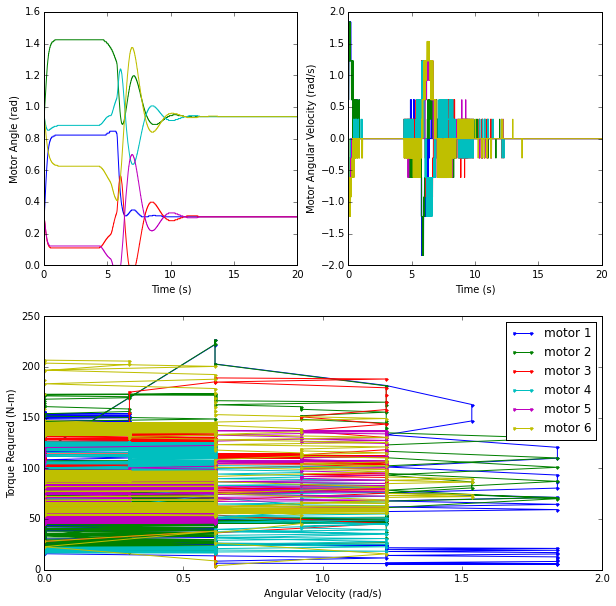

In [32]:
theta_z = yaw_desired[1]
x_desiredv = x_desired[1]
y_desiredv = y_desired[1]

#initialize derivatives and known zero vectors.
xdot_desired = zeros(len(t))
xddot_desired = zeros(len(t))
ydot_desired = zeros(len(t))
yddot_desired = zeros(len(t))
z_desired = zeros(len(t))
zdot_desired = zeros(len(t))
zddot_desired = zeros(len(t))
thetadot_x = zeros(len(t))
thetaddot_x = zeros(len(t))
thetadot_y = zeros(len(t))
thetaddot_y = zeros(len(t))
thetadot_z = zeros(len(t))
thetaddot_z = zeros(len(t))

#fill in with derivatives
xdot_desired[1:] = diff(x_desiredv)/diff(t)
xddot_desired[1:] = diff(xdot_desired)/diff(t)
ydot_desired[1:] = diff(y_desiredv)/diff(t)
yddot_desired[1:] = diff(ydot_desired)/diff(t)
thetadot_y[1:] = diff(theta_y)/diff(t)
thetaddot_y[1:] = diff(thetadot_y)/diff(t)
thetadot_x[1:] = diff(theta_x)/diff(t)
thetaddot_x[1:] = diff(thetadot_x)/diff(t)
thetadot_z[1:] = diff(theta_z)/diff(t)
thetaddot_z[1:] = diff(thetadot_z)/diff(t)

base = MotionBase(1.0,0.75,0.75,0.3,1.0)#this is our motion base.
base.plotbot(0,0,0,0,0,0)

#inertial properties
Jx = 15.63#kgm^2
Jy = 35.35#kgm^2
Jz = 40.5
m = 350/2.2#kg

print x_desiredv.shape,y_desiredv.shape,z_desired.shape,theta_x.shape,theta_y.shape,theta_z.shape
#now we will loop through each time index and calculate our stuff.

F = zeros((len(t),6))
M = zeros((len(t),6))
thetam0 = zeros(len(t))
thetam1 = zeros(len(t))
thetam2 = zeros(len(t))
thetam3 = zeros(len(t))
thetam4 = zeros(len(t))
thetam5 = zeros(len(t))

for ind in range(0,len(t)):
    #first, we have to set the motor angles
    motor_thetas,success = base.motor_thetas,junk = base.findthetam(x_desiredv[ind],y_desiredv[ind],z_desired[ind],theta_x[ind],theta_y[ind],theta_z[ind],0.001)
    thetam0[ind] = motor_thetas[0]
    thetam1[ind] = motor_thetas[1]
    thetam2[ind] = motor_thetas[2]
    thetam3[ind] = motor_thetas[3]
    thetam4[ind] = motor_thetas[4]
    thetam5[ind] = motor_thetas[5]
    #then, we will find the vectors from Q to P in global
    px,py,pz = base.findrpo(x_desiredv[ind],y_desiredv[ind],z_desired[ind],theta_x[ind],theta_y[ind],theta_z[ind])
    #now, we calculate the vector from O to Q for each motor
    qx,qy,qz = base.calcQ(motor_thetas)
    
    #now calculate the unit vectors for rpq
    e0 = array([px[0],py[0],pz[0]])/linalg.norm(array([px[0],py[0],pz[0]]))
    e1 = array([px[1],py[1],pz[1]])/linalg.norm(array([px[1],py[1],pz[1]]))
    e2 = array([px[2],py[2],pz[2]])/linalg.norm(array([px[2],py[2],pz[2]]))
    e3 = array([px[3],py[3],pz[3]])/linalg.norm(array([px[3],py[3],pz[3]]))
    e4 = array([px[4],py[4],pz[4]])/linalg.norm(array([px[4],py[4],pz[4]]))
    e5 = array([px[5],py[5],pz[5]])/linalg.norm(array([px[5],py[5],pz[5]]))
    #now we find the location of the points P relative to the platform position
    PX,PY,PZ = base.calculate_P(x_desiredv[ind],y_desiredv[ind],z_desired[ind],theta_x[ind],theta_y[ind],theta_z[ind])
    #align so that there's a correct point for each motor and subtract the platform position so we get the right vector.
    PXg = array([PX[0],PX[0],PX[1],PX[1],PX[2],PX[2]])-x_desiredv[ind]
    PYg = array([PY[0],PY[0],PY[1],PY[1],PY[2],PY[2]])-y_desiredv[ind]
    PZg = array([PZ[0],PZ[0],PZ[1],PZ[1],PZ[2],PZ[2]])-z_desired[ind]
    #construct the A matrix
    Amatrix = array([[e0[0], e1[0], e2[0], e3[0], e4[0], e5[0]],
                     [e0[1], e1[1], e2[1], e3[1], e4[1], e5[1]],
                     [e0[2], e1[2], e2[2], e3[2], e4[2], e5[2]],
                     [cross(array([PXg[0],PYg[0],PZg[0]]),e0)[0],cross(array([PXg[1],PYg[1],PZg[1]]),e1)[0],cross(array([PXg[2],PYg[2],PZg[2]]),e2)[0],cross(array([PXg[3],PYg[3],PZg[3]]),e3)[0],cross(array([PXg[4],PYg[4],PZg[4]]),e4)[0],cross(array([PXg[5],PYg[5],PZg[5]]),e5)[0]],
                     [cross(array([PXg[0],PYg[0],PZg[0]]),e0)[1],cross(array([PXg[1],PYg[1],PZg[1]]),e1)[1],cross(array([PXg[2],PYg[2],PZg[2]]),e2)[1],cross(array([PXg[3],PYg[3],PZg[3]]),e3)[1],cross(array([PXg[4],PYg[4],PZg[4]]),e4)[1],cross(array([PXg[5],PYg[5],PZg[5]]),e5)[1]],
                     [cross(array([PXg[0],PYg[0],PZg[0]]),e0)[2],cross(array([PXg[1],PYg[1],PZg[1]]),e1)[2],cross(array([PXg[2],PYg[2],PZg[2]]),e2)[2],cross(array([PXg[3],PYg[3],PZg[3]]),e3)[2],cross(array([PXg[4],PYg[4],PZg[4]]),e4)[2],cross(array([PXg[5],PYg[5],PZg[5]]),e5)[2]]])
    
    #construct the vector of inertial "forces"
    bvec = array([[m*xddot_desired[ind]],[m*yddot_desired[ind]],[m*zddot_desired[ind]+m*g],[Jx*thetaddot_x[ind]],[Jy*thetaddot_y[ind]],[Jz*thetaddot_z[ind]]])
    #now we invert the A matrix and solve for the magnitudes of the con-rod forces.
    Fnow = dot(linalg.inv(Amatrix),bvec)
    F[ind,:] = Fnow[:,0]
    #compute vector form of each of the 6 forces now that we solved for their magnitudes.
    F0 = F[ind,0]*e0
    F1 = F[ind,1]*e1
    F2 = F[ind,2]*e2
    F3 = F[ind,3]*e3
    F4 = F[ind,4]*e4
    F5 = F[ind,5]*e5
    #now we find the vector moments on each motor (in all directions) by crossing -Fi (equal and opposite) with rQ/O
    rqo0 = array([qx[0]-base.motor_X[0],qy[0]-base.motor_Y[0],qz[0]-base.motor_Z[0]])
    rqo1 = array([qx[1]-base.motor_X[1],qy[1]-base.motor_Y[1],qz[1]-base.motor_Z[1]])
    rqo2 = array([qx[2]-base.motor_X[2],qy[2]-base.motor_Y[2],qz[2]-base.motor_Z[2]])
    rqo3 = array([qx[3]-base.motor_X[3],qy[3]-base.motor_Y[3],qz[3]-base.motor_Z[3]])
    rqo4 = array([qx[4]-base.motor_X[4],qy[4]-base.motor_Y[4],qz[4]-base.motor_Z[4]])
    rqo5 = array([qx[5]-base.motor_X[5],qy[5]-base.motor_Y[5],qz[5]-base.motor_Z[5]])
    M0 = cross(-F0,rqo0)
    M1 = cross(-F1,rqo1)
    M2 = cross(-F2,rqo2)
    M3 = cross(-F3,rqo3)
    M4 = cross(-F4,rqo4)
    M5 = cross(-F5,rqo5)
    #now take this and dot with the motor yaw unit vector.
    M[ind,0] = dot(M0,array([cos(base.motor_yaws[0]),sin(base.motor_yaws[0]),0]))
    M[ind,1] = dot(M1,array([cos(base.motor_yaws[1]),sin(base.motor_yaws[1]),0]))
    M[ind,2] = dot(M2,array([cos(base.motor_yaws[2]),sin(base.motor_yaws[2]),0]))
    M[ind,3] = dot(M3,array([cos(base.motor_yaws[3]),sin(base.motor_yaws[3]),0]))
    M[ind,4] = dot(M4,array([cos(base.motor_yaws[4]),sin(base.motor_yaws[4]),0]))
    M[ind,5] = dot(M5,array([cos(base.motor_yaws[5]),sin(base.motor_yaws[5]),0]))


#now, to get motor requirement plots we need derivatives.
thetadotm0 = zeros(size(t))
thetadotm0[1:] = diff(thetam0)/diff(t)
thetadotm1 = zeros(size(t))
thetadotm1[1:] = diff(thetam1)/diff(t)
thetadotm2 = zeros(size(t))
thetadotm2[1:] = diff(thetam2)/diff(t)
thetadotm3 = zeros(size(t))
thetadotm3[1:] = diff(thetam3)/diff(t)
thetadotm4 = zeros(size(t))
thetadotm4[1:] = diff(thetam4)/diff(t)
thetadotm5 = zeros(size(t))
thetadotm5[1:] = diff(thetam5)/diff(t)
    
figure(figsize=(10,5))
subplot(1,2,1)
plot(t,F)
xlabel('Time (s)')
ylabel('Con-Rod Force (N)')
subplot(1,2,2)
plot(t,M)
xlabel('Time (s)')
ylabel('Motor Torques (N-m)')
legend(['1','2','3','4','5','6'])

figure(figsize=(10,10))
subplot(2,2,2)
plot(t,thetadotm0,t,thetadotm1,t,thetadotm2,t,thetadotm3,t,thetadotm4,t,thetadotm5)
xlabel('Time (s)')
ylabel('Motor Angular Velocity (rad/s)')
subplot(2,2,1)
plot(t,thetam0,t,thetam1,t,thetam2,t,thetam3,t,thetam4,t,thetam5)
xlabel('Time (s)')
ylabel('Motor Angle (rad)')
subplot(2,1,2)
plot(abs(thetadotm0),abs(M[:,0]),abs(thetadotm1),abs(M[:,1]),abs(thetadotm2),abs(M[:,2]),abs(thetadotm3),abs(M[:,3]),abs(thetadotm4),abs(M[:,4]),abs(thetadotm5),abs(M[:,5]),linewidth=1,marker='.')
xlabel('Angular Velocity (rad/s)')
ylabel('Torque Requred (N-m)')
legend(['motor 1','motor 2','motor 3','motor 4','motor 5','motor 6'])
